In [31]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline 



In [32]:
df = pd.read_csv('tweets_df.csv')

In [33]:
df.head()

,Handle,Text,Likes,Gender,Topic
0,@Rick_Crainium,and 17 othersSorry to interrupt he Good Morn...,3.6K,M,science
1,@keithebae,Seongmin didnt attend a tutoring academy but h...,1,M,mathematics
2,@JaredLesterSmi1,and 2 othersMaybe it a lack of science educa...,0,M,science
3,@Elonnieee,I’m so glad my bf is smartso he can do my math...,2,M,mathematics
4,@MainNashville,Meet Gena Johnson who has worked with John Pri...,0,F,engineering


In [34]:
sid = SentimentIntensityAnalyzer()
semtiment_polarity = df.apply(lambda r: sid.polarity_scores(r.Text), axis=1)

In [35]:
# turn the result into a data frame and add as columns to the original data
sentiment_df = pd.DataFrame(list(semtiment_polarity))
Tweet_sentiment = df.join(sentiment_df)


In [36]:
Tweet_sentiment.head()

,Handle,Text,Likes,Gender,Topic,neg,neu,pos,compound
0,@Rick_Crainium,and 17 othersSorry to interrupt he Good Morn...,3.6K,M,science,0.114,0.737,0.149,0.3182
1,@keithebae,Seongmin didnt attend a tutoring academy but h...,1,M,mathematics,0.000,1.000,0.000,0.0000
2,@JaredLesterSmi1,and 2 othersMaybe it a lack of science educa...,0,M,science,0.219,0.662,0.119,-0.7396
3,@Elonnieee,I’m so glad my bf is smartso he can do my math...,2,M,mathematics,0.000,0.798,0.202,0.5095
4,@MainNashville,Meet Gena Johnson who has worked with John Pri...,0,F,engineering,0.000,0.950,0.050,0.5423


In [37]:
def sentiment (row):
    if row['compound'] >= 0.05 :
        return 'positive'
    elif row['compound'] <= -0.05 :
        return 'negative'
    else :
        return 'neutral'
    
Tweet_sentiment['sentiment'] = Tweet_sentiment.apply (lambda row: sentiment(row), axis=1)

Tweet_sentiment.head()

,Handle,Text,Likes,Gender,Topic,neg,neu,pos,compound,sentiment
0,@Rick_Crainium,and 17 othersSorry to interrupt he Good Morn...,3.6K,M,science,0.114,0.737,0.149,0.3182,positive
1,@keithebae,Seongmin didnt attend a tutoring academy but h...,1,M,mathematics,0.000,1.000,0.000,0.0000,neutral
2,@JaredLesterSmi1,and 2 othersMaybe it a lack of science educa...,0,M,science,0.219,0.662,0.119,-0.7396,negative
3,@Elonnieee,I’m so glad my bf is smartso he can do my math...,2,M,mathematics,0.000,0.798,0.202,0.5095,positive
4,@MainNashville,Meet Gena Johnson who has worked with John Pri...,0,F,engineering,0.000,0.950,0.050,0.5423,positive


In [38]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


Interpretation: Figure 2 shows that STEM tweets about women have a slightly more positive overall sentiment than STEM tweets about men


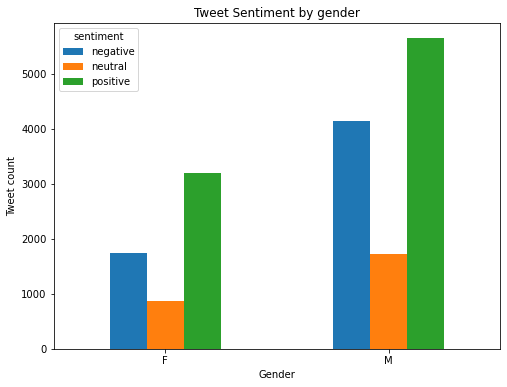

In [39]:
sentiment = Tweet_sentiment.groupby(['Gender', 'sentiment']).sentiment.count().unstack()
sentiment.plot(kind='bar')
plt.title('Tweet Sentiment by gender')
plt.xlabel('Gender')
plt.ylabel('Tweet count')
plt.xticks(rotation = 0)

print("""Interpretation: Figure 2 shows that STEM tweets about women have a slightly more positive overall sentiment than STEM tweets about men""")

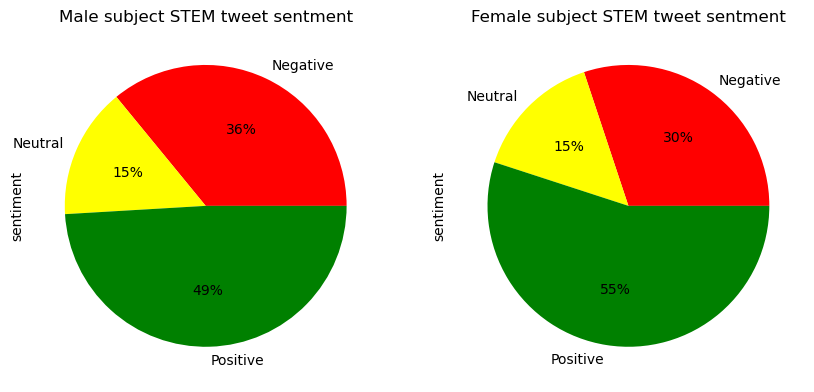

In [40]:
df_M = Tweet_sentiment.loc[df['Gender']== "M"]
df_F = Tweet_sentiment.loc[df['Gender']=="F"]

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

labels = ['Negative', 'Neutral', 'Positive']

figure(figsize=(10, 10), dpi=100)

                        
plt.subplot(1, 2, 1)
df_M.groupby(['Gender', 'sentiment']).sentiment.count().plot(kind='pie', autopct='%1.0f%%', labels=labels, colors=["red", "yellow", "green"])
matplotlib.pyplot.title(label="Male subject STEM tweet sentment", fontdict=None, loc='center', pad=None)

plt.subplot(1, 2, 2)
df_F.groupby(['Gender', 'sentiment']).sentiment.count().plot(kind='pie', autopct='%1.0f%%', labels=labels, colors=["red", "yellow", "green"])
matplotlib.pyplot.title(label="Female subject STEM tweet sentment", fontdict=None, loc='center', pad=None)

plt.show()